<a href="https://colab.research.google.com/github/sahithik070/CRT-INTERNSHIP/blob/main/hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2937 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1433 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0881 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0739 - accuracy: 0.9763


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 1s - loss: 0.0765 - accuracy: 0.9763 - 1s/epoch - 3ms/step
Test accuracy: 0.9763000011444092


In [7]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


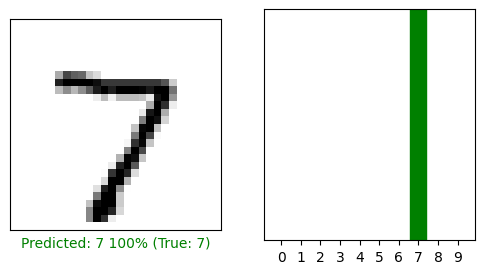

In [8]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(predicted_label,
                                                          100 * np.max(predictions_array),
                                                          true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()
